In [243]:
import sys
import os
import re
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [249]:
# Returns a list of sugar counts if the country is in the tag
def return_sugars(df, country):
    sugar_index = df.columns.get_loc('sugars_100g')
    country_index = df.columns.get_loc('countries_tags')
    return [row[sugar_index] for index, row in df.iterrows() if country in row[country_index]]

def return_category_tags(df, country):
    product_index = df.columns.get_loc('categories_en')
    country_index = df.columns.get_loc('countries_tags')
    return [row[product_index] for index, row in df.iterrows() if country in row[country_index]]

In [4]:
# Just the data reading step. I check if the path for the file exist, and if so, ready the data from the file
data_directory = os.getcwd()
data_path = 'data\world-food-facts\FoodFacts.csv'
data_path = os.path.join(data_directory, data_path)

if os.path.exists(data_path): 
    world_food_facts = pd.read_csv(data_path)
    world_food_facts.countries = world_food_facts.countries.str.lower()
    print("Data loaded. There are {} rows".format(world_food_facts.shape[0]))
else:
    print("Error: source data location: {} does not exist".format(data_path))

Data loaded. There are 65503 rows


C:\Users\dsharp\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [138]:
# For my approach, I need to remove the rows where the countries_tags and sugars_100g are null
worlds_sugars = world_food_facts[(world_food_facts.countries_tags.notnull() & world_food_facts.sugars_100g.notnull())]
"After removing rows where countries_tags and sugars_100g columns are null, there are {} rows".format(len(worlds_sugars))

'After removing rows where countries_tags and sugar_100g columns are null, there are 32611'

In [222]:
country_tags = []
for index, item in worlds_sugars.iterrows():
    if len(item[tag_index].split(",")) > 1:
        for country in (item[tag_index].split(",")):
            if ":" in country and country.split(":")[1] not in country_tags:
                country_tags.append(country.split(":")[1])
    else:
        if ":" in country and country.split(":")[1] not in country_tags:
            country_tags.append(country.split(":")[1])

In [223]:
country_tags[:5]

['france', 'united-kingdom', 'united-states', 'australia', 'new-zealand']

In [224]:
len(set(country_tags))

69

In [225]:
num = return_sugars(worlds_sugars, '日本')
print(len(num))
np.mean(return_sugars(worlds_sugars, '日本'))

1


0.0

In [149]:
worlds = world_food_facts[world_food_facts.countries_tags.notnull()]

In [234]:
sugar_mean_dic = {}
for country in country_tags:
    print("looking for country: {}".format(country))
    sugar = return_sugars(worlds_sugars, country)
    if len(sugar) > 9:
        sugar_mean_dic[country] = np.mean(sugar)

looking for country: france
looking for country: united-kingdom
looking for country: united-states
looking for country: australia
looking for country: new-zealand
looking for country: singapore
looking for country: thailand
looking for country: denmark
looking for country: spain
looking for country: canada
looking for country: quebec
looking for country: czech-republic
looking for country: indonesia
looking for country: italy
looking for country: french-guiana
looking for country: switzerland
looking for country: belgium
looking for country: philippines
looking for country: europe
looking for country: lithuania
looking for country: portugal
looking for country: germany
looking for country: netherlands
looking for country: austria
looking for country: romania
looking for country: scotland
looking for country: morocco
looking for country: ireland
looking for country: guadeloupe
looking for country: monaco
looking for country: reunion
looking for country: luxembourg
looking for country: j

In [235]:
sugar_mean_dic.keys()

dict_keys(['austria', 'hong-kong', 'italy', 'australia', 'romania', 'greece', 'united-states', 'czech-republic', 'reunion', 'spain', 'canada', 'netherlands', 'poland', 'tunisia', 'sweden', 'europe', 'guadeloupe', 'saint-pierre-and-miquelon', 'quebec', 'french-guiana', 'new-zealand', 'portugal', 'france', 'thailand', 'switzerland', 'denmark', 'belgium', 'luxembourg', 'martinique', 'germany', 'united-kingdom'])

In [236]:
sugar_mean_sorted_list = sorted(sugar_mean_dic.items(), key=operator.itemgetter(1))

In [237]:
sugar_mean_sorted_list.reverse()

In [238]:
for country in sugar_mean_sorted_list[:2]:
    print(country[0])

tunisia
quebec


In [239]:
country_list = [pair[0] for pair in sugar_mean_sorted_list]
sugar_list = [pair[1] for pair in sugar_mean_sorted_list]

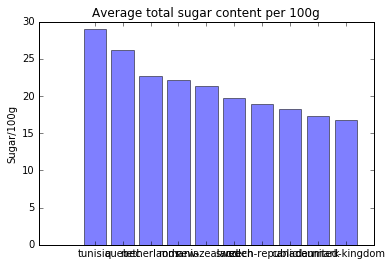

In [244]:
y_pos = np.arange((len(country_list[:10])))
plt.bar(y_pos, sugar_list[:10], align='center', alpha=0.5)
plt.title('Average total sugar content per 100g')
plt.xticks(y_pos, country_list[:10])
plt.ylabel('Sugar/100g')
plt.show()

In [245]:
country_list[0]

'tunisia'

In [254]:
return_category_tags(worlds_sugars, country_list[0])

[nan,
 'Sugary snacks,Chocolates',
 'ar:Choclate',
 'Chips',
 'Dairies,Yogurts',
 'Salty snacks,Appetizers,Chips and fries,Crisps',
 'Sugary snacks,Biscuits and cakes,Biscuits',
 'Sugary snacks,Biscuits and cakes,Biscuits',
 'Sugary snacks,Biscuits and cakes,Biscuits',
 'Sugary snacks,Biscuits and cakes,Biscuits',
 'Dairies,Yogurts,Stirred yogurts',
 'Dairies,Yogurts,Fruit yogurts',
 'Sugary snacks,Chocolates',
 'Sugary snacks,Chocolates',
 'Sugary snacks,Chocolates',
 'Sugary snacks,Chocolates',
 'Beverages,Carbonated drinks,Sodas,Sugared beverages',
 'Sugary snacks,Chocolates',
 'fr:Vermicelle']